In [1]:
from bs4 import BeautifulSoup
import requests
import itertools
import re
result = []
for j in range(8):
    url = "https://icook.tw/categories/216?page={}".format(j)
    rescook = requests.get(url)
    soup = BeautifulSoup(rescook.text, "lxml")
    
    for i in range(12):
        text = soup.select('.material')[i].text[3:]
        text = text.split('、')
        text_unpr = []
        for q in text:
            text_unpr.append(re.sub(r'\([^)]*\)|【[^)]*】|［[^)]*］|（[^)]*）| [^)]*','',q))
        result.extend(list(itertools.combinations(text_unpr, 2)))

for j in range(8):
    url = "https://icook.tw/categories/63?page={}".format(j)
    rescook = requests.get(url)
    soup = BeautifulSoup(rescook.text, "lxml")
    
    for i in range(12):
        text = soup.select('.material')[i].text[3:]
        text = text.split('、')
        text_unpr = []
        for q in text:
            text_unpr.append(re.sub(r'\([^)]*\)|【[^)]*】|［[^)]*］|（[^)]*）| [^)]*','',q))
        result.extend(list(itertools.combinations(text_unpr, 2)))
print('Number of total pairs:', len(result))
print('Some examples:', result[:6])

Number of total pairs: 9309
Some examples: [('苜蓿芽', '番茄丁'), ('苜蓿芽', '牛頭牌咖哩炒醬'), ('苜蓿芽', '米血糕'), ('苜蓿芽', '沙茶醬'), ('苜蓿芽', '花生粉'), ('苜蓿芽', '蒜泥')]


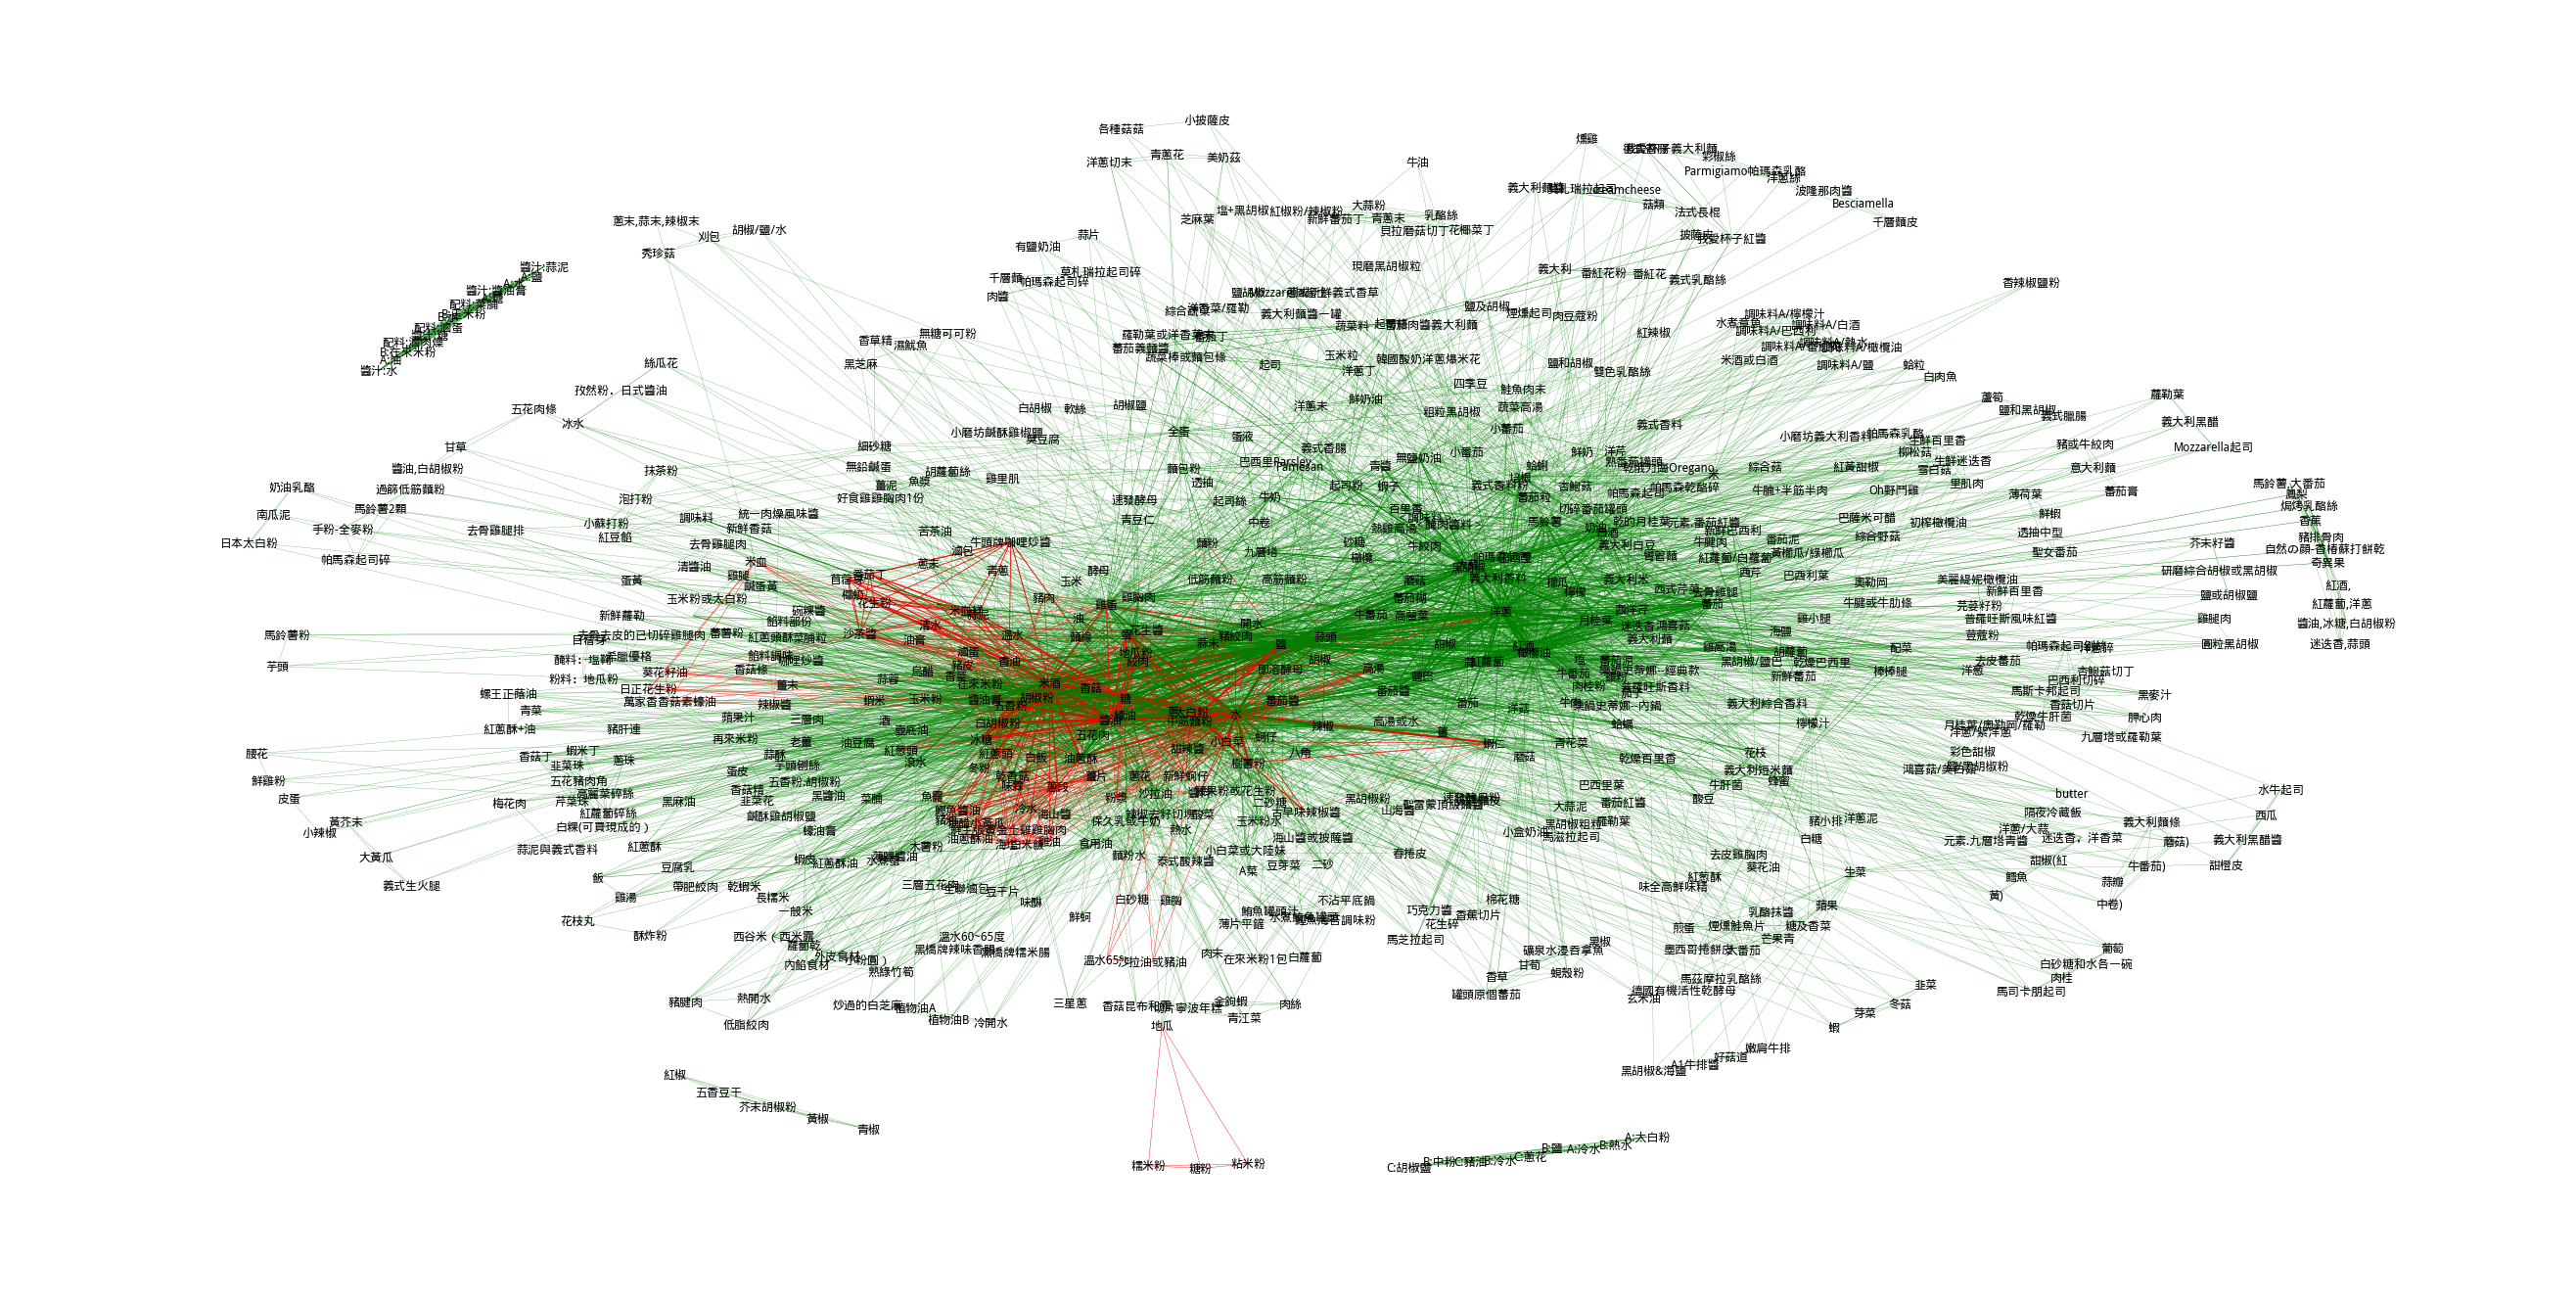

In [9]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.font_manager as fm
%matplotlib inline

WQY = fm.FontProperties(fname = "/usr/share/fonts/truetype/wqy/wqy-microhei.ttc")
nx.set_fontproperties(WQY)

default_weight = 0.2
G = nx.Graph()

BLUE = "#99CCFF"
GRAY = "#b3cccc"

for nodes in result[:609]:
    n0 = nodes[0]
    n1 = nodes[1]
    if G.has_edge(n0,n1):   
        G[n0][n1]['weight'] += default_weight
    else:
        G.add_edge(n0,n1, color = 'b', weight = default_weight)
        
for nodes in result[610:]:
    n0 = nodes[0]
    n1 = nodes[1]
    if nodes in result[:609]:
        G[n0][n1]['color'] = 'r'
        if G.has_edge(n0,n1):   
            G[n0][n1]['weight'] += default_weight
        else:
            G.add_edge(n0,n1, color = 'r', weight = default_weight)
    else:
        if G.has_edge(n0,n1):   
            G[n0][n1]['weight'] += default_weight
        else:
            G.add_edge(n0,n1, color = 'g', weight = default_weight)

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]

nx.draw(G, node_color = BLUE, with_labels = True, edge_color=colors, width=weights, node_size = 1)
fig = plt.gcf()
fig.set_size_inches(36, 18)
fig.savefig('joint_tw_it.png', dpi=100)

In [3]:
import operator
from collections import Counter

sorted_dg = sorted(nx.degree(G).items(), key = operator.itemgetter(1), reverse = True)
print('Degree:',sorted_dg[:15])

print()

sorted_close = sorted(nx.closeness_centrality(G).items(), key = operator.itemgetter(1), reverse = True)
print('Closeness centrality:',sorted_close[:15])

print()

sorted_degree = sorted(nx.degree_centrality(G).items(), key = operator.itemgetter(1), reverse = True)
print('Degree centrality:',sorted_degree[:15])


Degree: [('鹽', 273), ('洋蔥', 219), ('醬油', 196), ('水', 187), ('橄欖油', 173), ('米酒', 170), ('蒜頭', 150), ('糖', 142), ('胡椒粉', 119), ('黑胡椒', 110), ('蒜末', 106), ('油蔥酥', 100), ('雞蛋', 92), ('紅蘿蔔', 88), ('月桂葉', 86)]

Closeness centrality: [('鹽', 0.6035372763941768), ('洋蔥', 0.5724948052047631), ('醬油', 0.5512307124400148), ('水', 0.5470626163157046), ('橄欖油', 0.5439776767500146), ('米酒', 0.53591874820557), ('蒜頭', 0.5290605558153707), ('糖', 0.5181667395362717), ('黑胡椒', 0.5095002183644503), ('胡椒粉', 0.5086047874007166), ('蒜末', 0.5046139913356718), ('紅蘿蔔', 0.49767175241789813), ('油蔥酥', 0.4925891472868217), ('豬絞肉', 0.4917521223976343), ('番茄醬', 0.49133467577420664)]

Degree centrality: [('鹽', 0.4232558139534884), ('洋蔥', 0.3395348837209302), ('醬油', 0.30387596899224806), ('水', 0.289922480620155), ('橄欖油', 0.2682170542635659), ('米酒', 0.26356589147286824), ('蒜頭', 0.23255813953488372), ('糖', 0.22015503875968992), ('胡椒粉', 0.18449612403100774), ('黑胡椒', 0.17054263565891473), ('蒜末', 0.16434108527131783), ('油蔥酥', 0.155

In [4]:
nd = G.number_of_nodes()
possible_edges = nd*(nd-1)/2

print('Total possible edges:',possible_edges)
print('Total edges in the graph:',G.number_of_edges())

density = round(nx.density(G),4)
print('Density:',density)
print()
print(nx.info(G))

Total possible edges: 208335.0
Total edges in the graph: 6067
Density: 0.0291

Name: 
Type: Graph
Number of nodes: 646
Number of edges: 6067
Average degree:  18.7833


In [8]:
import operator
from collections import Counter
myDict = Counter(result)
sorted_x = sorted(myDict.items(), key = operator.itemgetter(1), reverse = True)
print('Number of sorted unique pairs:', len(sorted_x))
print(sorted_x[:15])

Number of sorted unique pairs: 6507
[(('太白粉', '水'), 18), (('醬油', '米酒'), 18), (('洋蔥', '黑胡椒'), 17), (('洋蔥', '橄欖油'), 16), (('洋蔥', '鹽'), 15), (('醬油', '糖'), 14), (('米酒', '糖'), 13), (('蒜頭', '醬油'), 12), (('糖', '水'), 11), (('小白菜', '水'), 11), (('洋蔥', '月桂葉'), 11), (('蛋', '水'), 11), (('水', '糖'), 11), (('水', '鹽'), 11), (('洋蔥', '白酒'), 10)]


In [6]:
max_degree_item = max(nx.degree(G).items(),key=operator.itemgetter(1))
print(max_degree_item[1])

273


In [7]:
total = 0
for i,v in nx.degree(G).items():
    subv = max_degree_item[1] - v
    total += subv

dn = (nd-1)*(nd-2)
centr = total/dn
print('Group centrality:',round(centr,4))

Group centrality: 0.3954
